# Problem Satatement

# Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



# Data Description
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.




CSV containing the item outlet information with sales value




* Variable	Description
* Item_Identifier	Unique product ID
* Item_Weight	Weight of product
* Item_Fat_Content	Whether the product is low fat or not
* Item_Visibility	The % of total display area of all products in a store allocated to the particular product
* Item_Type	The category to which the product belongs
* Item_MRP	Maximum Retail Price (list price) of the product
* Outlet_Identifier	Unique store ID
* Outlet_Establishment_Year	The year in which store was established
* Outlet_Size	The size of the store in terms of ground area covered
* Outlet_Location_Type	The type of city in which the store is located
* Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.

#1. Hypothesis Generation

**Store Level Hypotheses:**

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

**Product Level Hypotheses:**

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

#2. Data Exploration

In [1]:
cd "/content/drive/My Drive/Colab Notebooks/ML_Projects/Regression/BigMart_Sales_prediction"

/content/drive/My Drive/Colab Notebooks/ML_Projects/Regression/BigMart_Sales_prediction


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test],axis=0)

In [6]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
* Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
* The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [10]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [11]:
#Analysing Categorical variables
categorical_columns = [x for x in df.select_dtypes(include='object')]
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier']]
for col in categorical_columns:
  print(f'\nFrequency of Categories for varible {col:s}:')
  print(df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier:
OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories f

* Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
* Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
* Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

#3. Data Cleaning

inputing missing data: (`Item_Weight` and `Outlet_Size`)

In [12]:
df["Item_Weight"].isna().sum()

2439

In [13]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [14]:
Item_Weights = df.groupby('Item_Type')['Item_Weight'].mean().rename('Mean').to_frame()
Item_Weights['Max'] =  df.groupby('Item_Type')['Item_Weight'].max().rename('Max')
Item_Weights['Min'] =  df.groupby('Item_Type')['Item_Weight'].min().rename('Min')
Item_Weights['Count'] =  df.groupby('Item_Type')['Item_Weight'].count().rename('Count')

In [15]:
Item_Weights.sort_values(by='Mean',ascending=False)

,Mean,Max,Min,Count
Item_Type,,,,
Others,13.915724,20.50,5.500,228
Starchy Foods,13.659758,21.20,6.695,227
Household,13.337977,21.25,5.030,1285
Dairy,13.238358,20.70,4.805,941
Fruits and Vegetables,13.194406,21.35,5.460,1667
Breakfast,13.179112,21.10,6.425,152
Health and Hygiene,13.171739,21.25,5.175,710
Snack Foods,12.865732,21.25,5.095,1653
Meat,12.766104,21.25,5.150,607


In [16]:
df["Item_Weight"] = df.groupby("Item_Type")['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

#Another way to do the same thing:
# df.loc[df['Item_Weight'].isna(),'Item_Weight'] = df.loc[df['Item_Weight'].isna(),'Item_Type'].apply(lambda x: Item_Weights['Mean'].loc[x])

In [17]:
df["Outlet_Size"].isna().sum()

4016

In [18]:
#Import mode function:
from scipy.stats import mode

In [19]:
df.groupby(['Outlet_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  High           1553
                   Medium         1550
                   Small          3100
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [20]:
df.pivot_table(index='Outlet_Type', values='Outlet_Size' ,aggfunc=(lambda x: mode(x)))

,Outlet_Size
Outlet_Type,
Grocery Store,"([Small], [880])"
Supermarket Type1,"([Small], [3100])"
Supermarket Type2,"([Medium], [1546])"
Supermarket Type3,"([Medium], [1559])"


In [21]:
outlet_size_mode = df.groupby("Outlet_Type")['Outlet_Size'].agg(lambda x: mode(x)[0])

In [22]:
miss_bool = df['Outlet_Size'].isnull() 

In [23]:
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

#4. Feature Engineering

Checking if we can combine Supermarket Type2 and Supermarket Type3

In [24]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

Modify Item_Visibility

In [25]:
df.groupby('Item_Identifier')['Item_Visibility'].sum().sort_values()

Item_Identifier
DRM59    0.035053
FDU04    0.043024
FDE20    0.044285
FDG12    0.044317
FDK51    0.045437
           ...   
FDY08    1.955752
FDU13    1.956789
FDR14    1.989749
FDS12    1.990543
NCE31    2.113153
Name: Item_Visibility, Length: 1559, dtype: float64

In [26]:
#Replace zero Item_Visibility with the mean of each Item_Identifier
replace_this = (df['Item_Visibility']==0)
visibility_avg = df.groupby('Item_Identifier')['Item_Visibility'].sum()
df.loc[replace_this,'Item_Visibility'] = df.loc[replace_this,'Item_Identifier'].apply(lambda x: visibility_avg[x])

#alternative
#df['Item_Visibility'] = df.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: x.replace(0,x.mean()))

Create a broad category of Type of Item

In [27]:
df['Item_Identifier'].apply(lambda x: x[:2]).unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [28]:
Category_Map = {'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'}
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[:2]).map(Category_Map)
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Combined, dtype: int64

Determine the years of operation of a store

In [29]:
df['Outlet_Years'] = 2020 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        22.169319
std          8.371664
min         11.000000
25%         16.000000
50%         21.000000
75%         33.000000
max         35.000000
Name: Outlet_Years, dtype: float64

Modify categories of Item_Fat_Content

In [30]:
#Change categories of low fat:
print('Original Categories:')
print(df['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [31]:
correct_map = {'LF': 'Low Fat','low fat':'Low Fat','reg':'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(correct_map)

In [32]:
df.loc[df['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']= 'Non-Edible'

In [33]:
print('New Categories:')
print(df['Item_Fat_Content'].value_counts())

New Categories:
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64


Numerical and One-Hot Coding of Categorical variables

In [34]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [35]:
df['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
5676    OUT046
5677    OUT018
5678    OUT045
5679    OUT017
5680    OUT045
Name: Outlet_Identifier, Length: 14204, dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

In [38]:
var_mod = ['Item_Fat_Content',  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Outlet','Item_Type_Combined'] #'Item_Type',
for var in var_mod:
  df[var] = le.fit_transform(df[var])

In [39]:
df = pd.get_dummies(df,columns=var_mod)

In [40]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
O

In [92]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,21,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,11,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,21,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,FDX07,19.20,0.160509,182.0950,OUT010,732.3800,train,22,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,NCD19,8.93,0.088018,53.8614,OUT013,994.7052,train,33,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Exporting Data

In [41]:
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [42]:
#Divide into test and train:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [43]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [44]:
#Export files as modified versions:
train.to_csv('train_modified.csv')
test.to_csv('test_modified.csv')

#5. Model Building

Baseline Model:  Requires no predictive model and its like an informed guess. In this case lets predict the sales as the overall average sales

In [45]:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

In [74]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']


Function that takes the algorithm and data as input and makes the model, performs cross-validation and generates submission.

In [65]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
  #Fit
  alg.fit(dtrain[predictors],dtrain[target])

  #Predict
  dtrain_predictions = alg.predict(dtrain[predictors])

  #cross-validate
  cv_score = cross_val_score(alg, dtrain[predictors],dtrain[target],cv=20,scoring='neg_mean_squared_error')
  cv_score = np.sqrt(abs(cv_score))

  #Print results:
  print('\nModel Report')
  print('Train RMSE: {:.4g}'.format(np.sqrt(metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))))

  print("CV Score : Mean - {:.4g} | Std - {:.4g} | Min - {:.4g} | Max - {:.4g}\n".format(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
  
  #Predict on testing data:
  dtest[target] = alg.predict(dtest[predictors])
  submission = pd.DataFrame({ x: dtest[x] for x in [target] + IDcol})
  submission.to_csv(filename,index=False)

Linear Regression


Model Report
RMSE: 1127
CV Score : Mean - 1129 | Std - 43.5 | Min - 1075 | Max - 1210



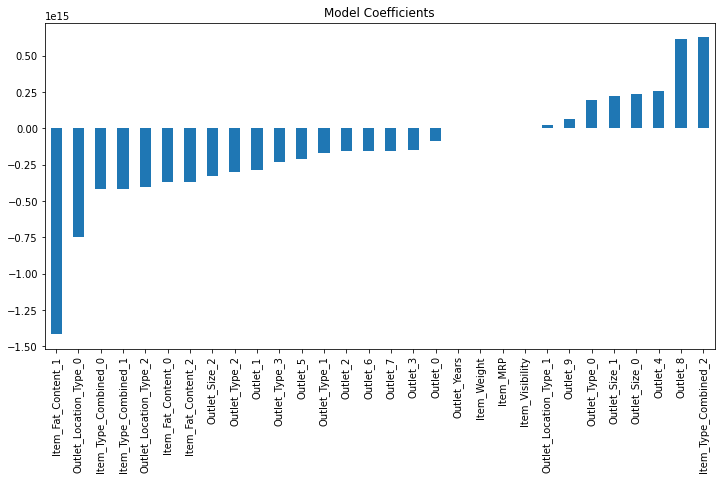

In [73]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(12,6))

Ridge


Model Report
RMSE: 1181
CV Score : Mean - 1181 | Std - 53.56 | Min - 1104 | Max - 1296



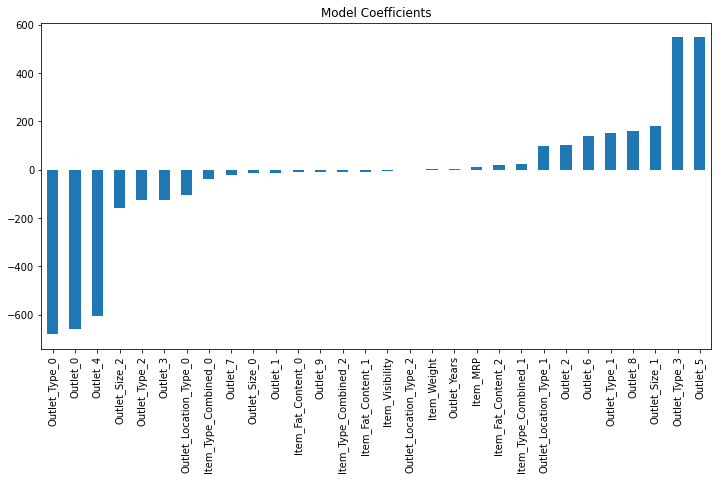

In [71]:
alg2 = Ridge(alpha=0.5, normalize=True)
modelfit(alg2,train,test,predictors,target,IDcol,'alg2.csv')
coef2 = pd.Series(alg2.coef_,predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients',figsize=(12,6))

Decision Tree


Model Report
RMSE: 1059
CV Score : Mean - 1091 | Std - 44.33 | Min - 1012 | Max - 1178



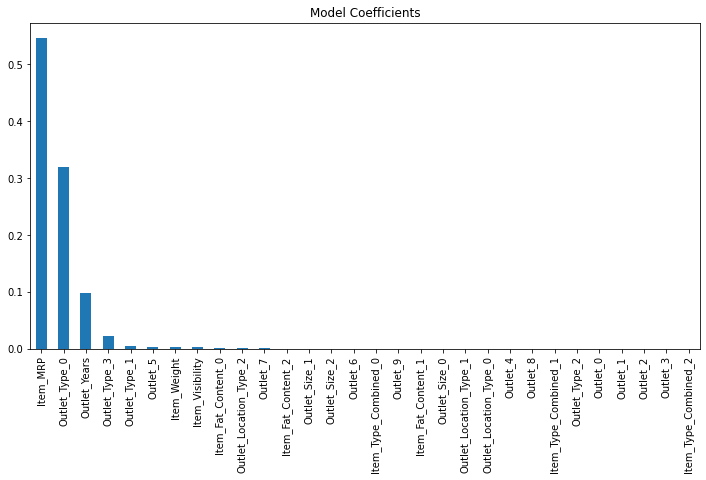

In [79]:
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3,train,test,predictors,target,IDcol,'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_,predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Model Coefficients',figsize=(12,6))

In [ ]:
#Training error is less than test error. Sign of overfitting.


Random Forest


Model Report
RMSE: 1073
CV Score : Mean - 1084 | Std - 43.46 | Min - 1021 | Max - 1160



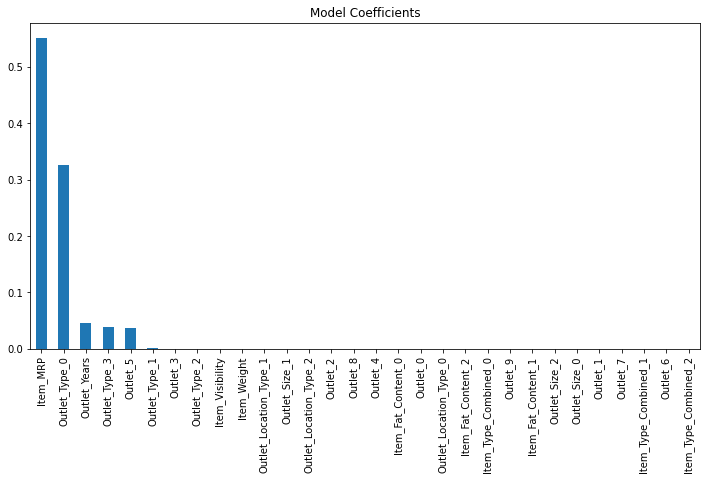

In [83]:
alg4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg4,train,test,predictors,target,IDcol,'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_,predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Model Coefficients',figsize=(12,6))

XGBoost

In [85]:
from xgboost import XGBRegressor


Model Report
RMSE: 1041
CV Score : Mean - 1080 | Std - 45.94 | Min - 1001 | Max - 1174



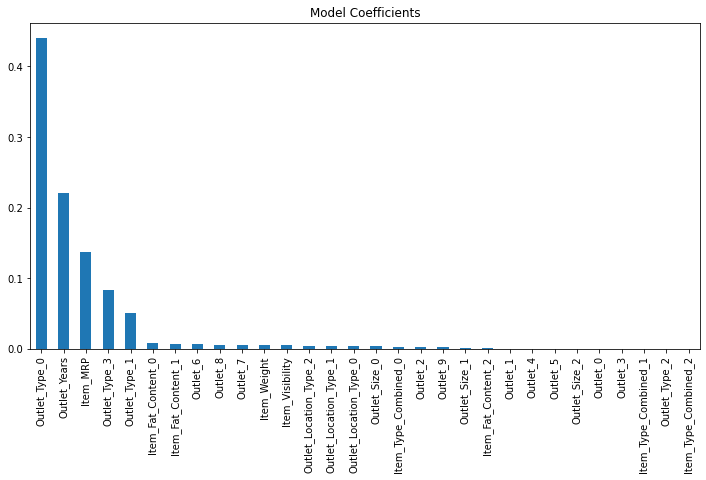

In [88]:
alg5 = XGBRegressor(silent=True)
modelfit(alg5,train,test,predictors,target,IDcol,'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_,predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Model Coefficients',figsize=(12,6))

Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingRegressor


Model Report
RMSE: 1038
CV Score : Mean - 1084 | Std - 45.52 | Min - 1003 | Max - 1181



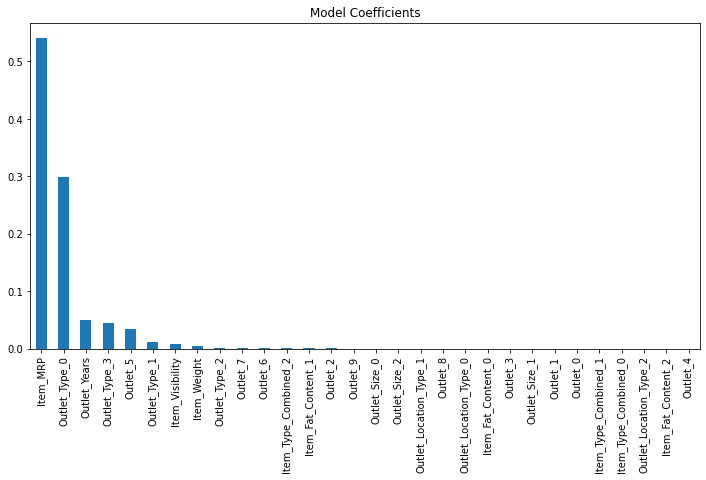

In [91]:
alg6 = GradientBoostingRegressor()
modelfit(alg6,train,test,predictors,target,IDcol,'alg5.csv')
coef6 = pd.Series(alg6.feature_importances_,predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Model Coefficients',figsize=(12,6))

Numerical and One-Hot Coding of Categorical variables

References:

- Analytics Vidhya - [Approach and Solution to break in Top 20 of Big Mart Sales prediction](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/)

- Kaggle - [Big Mart Sales Prediction Dataset](https://www.kaggle.com/devashish0507/big-mart-sales-prediction)